In [144]:
import pandas as pd
import numpy as np

df_original = pd.read_csv("../data/owid-covid-data.csv")
df_descrip = pd.read_csv("../data/owid-covid-codebook.csv", index_col='column')
df_original.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


# EDA Part

In [145]:
target = 'total_cases'
ind = 'iso_code' # can uniquely locate one country/region
# There's obvious group structure and time series property in this dataframe
# A regression proble, can be multi-variable or auto-regression
print(df_original.shape)  # size of the dataframe
print(len(df_original[ind].unique()))  # number of countries/regions

(122636, 65)
233


In [146]:
print(df_descrip.shape) # 65, 3
df_descrip.head(65)

(65, 3)


,source,category,description
column,,,
iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country codes
continent,Our World in Data,Others,Continent of the geographical location
location,Our World in Data,Others,Geographical location
date,Our World in Data,Others,Date of observation
total_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,Total confirmed cases of COVID-19
new_cases,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,New confirmed cases of COVID-19
new_cases_smoothed,COVID-19 Data Repository by the Center for Sys...,Confirmed cases,New confirmed cases of COVID-19 (7-day smoothed)
total_deaths,COVID-19 Data Repository by the Center for Sys...,Confirmed deaths,Total deaths attributed to COVID-19
new_deaths,COVID-19 Data Repository by the Center for Sys...,Confirmed deaths,New deaths attributed to COVID-19


To decide whether a columns is categorical/continuous, I just look at the 'category' column in df_descrip
* keys: categorical
* Confirmed cases/deaths, Tests & positivity, Vaccinations: number of people, which should be integers. I think using continuous can be easier, because some columns are about ratios
* Reproduction rate: continuous
* Hospital & ICU: similar to confirmed cases, but still use continous
* thers(not keys): some indices about the population of one country, regarded as continuous
* Excess mortality: similar to population, continous

In [147]:
# some info
total_records = df_original.shape[0]
print(df_original.columns)
print(len(df_original["location"].unique()))  # 233 different places
# first four columns: object(iso_code, continent, location, data) which are keys, actually we only need iso and date
# others are float64, except for tests_units
pd.set_option('display.max_rows', None)
#print(df_original.dtypes)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [148]:
keys = ['iso_code',  'date']  # unique values to locate one row
data = list(df_original.columns)[4:]
target = 'total_cases'

# A special column in data: tests_units
# Units used by the location to report its testing data, this does not have clear relationship with my target
# So I just leave out this column in my project
print(df_original['tests_units'].unique())
data.remove('tests_units')

[nan 'tests performed' 'people tested' 'units unclear' 'samples tested']


In [149]:
# get to know how much missing data for each column
missing_ratio = {}
for feature in data:
    count = len(df_original[ np.isnan(df_original[feature]) ])
    missing_ratio[feature] = count / total_records

missing_sorted = sorted(missing_ratio.items(), key=lambda x: x[1])# , reverse=True)
for tup in missing_sorted:
    print(tup[0].ljust(40), tup[1])
    
# I see that there're missing values in each column

population                               0.007077856420626896
total_cases                              0.05145308066146972
new_cases                                0.051485697511334354
life_expectancy                          0.051583548060928276
total_cases_per_million                  0.056443458690759646
new_cases_per_million                    0.05647607554062429
new_cases_smoothed                       0.059754068952020616
new_deaths_smoothed                      0.059754068952020616
new_cases_smoothed_per_million           0.06470367591897974
new_deaths_smoothed_per_million          0.06470367591897974
population_density                       0.07590756384748361
diabetes_prevalence                      0.08795948987246811
gdp_per_capita                           0.11267490785739913
human_development_index                  0.1149254704980593
cardiovasc_death_rate                    0.11568381225741219
median_age                               0.11799145438533547
aged_70_older      

In [150]:
# draw a global map with each countries data
# using iso_code to locate
df_newest = df_original[df_original['date'] == '2021-10-06']
# if isnan, just replace with zero when visualization
# 12 countries have missing values
df_newest[np.isnan(df_newest['total_cases'])]['location']

5793                          Aruba
13177                       Bermuda
16365        British Virgin Islands
21355                Cayman Islands
28076                       Curacao
38366                Faeroe Islands
43764                     Gibraltar
44620                     Greenland
54587                   Isle of Man
74767                    Montserrat
99200     Sint Maarten (Dutch part)
113682     Turks and Caicos Islands
Name: location, dtype: object

In [151]:
df_pos = pd.read_csv("https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv")
# df_pos.head()
df_pos = df_pos.rename(columns={'Alpha-3 code': 'iso_code', 'Latitude (average)': 'latitude', 'Longitude (average)':'longitude'})
df_pos.head()
special = ['AFR', 'ASI', 'CYN', 'EUN', 'EUR', 'INT', 'KOS', 'NAM', 'OCE', 'SAM', 'WRL']
for i in range(df_pos.shape[0]):
    df_pos.iloc[i]['iso_code'] = df_pos.iloc[i]['iso_code'][2:-1]
    #if df_pos.iloc[i]['iso_code'] in special:
     #   df_pos.iloc[i]['iso_code'] = 'OWID_' + df_pos.iloc[i]['iso_code']
    df_pos.iloc[i]['latitude'] = float(df_pos.iloc[i]['latitude'][2:-1])
    df_pos.iloc[i]['longitude'] = float(df_pos.iloc[i]['longitude'][2:-1])
df_newest = df_newest.merge(df_pos[["iso_code", 'latitude', 'longitude']], on='iso_code')
df_newest.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,latitude,longitude
0,AFG,Asia,Afghanistan,2021-10-06,155380.0,71.0,36.000,7220.0,6.0,2.286,...,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN,33.0,65.0
1,ALB,Europe,Albania,2021-10-06,173190.0,572.0,532.571,2734.0,9.0,7.000,...,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN,41.0,20.0
2,DZA,Africa,Algeria,2021-10-06,204171.0,125.0,139.000,5838.0,7.0,4.714,...,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN,28.0,3.0
3,AND,Europe,Andorra,2021-10-06,15284.0,13.0,10.714,130.0,0.0,0.000,...,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN,42.5,1.6
4,AGO,Africa,Angola,2021-10-06,60448.0,553.0,552.143,1598.0,11.0,8.714,...,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN,-12.5,18.5


In [152]:
df_original.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.163260e+05,116322.000000,115308.000000,1.054880e+05,105641.000000,115308.000000,115714.000000,115710.000000,114701.000000,104889.000000,...,84658.000000,83430.000000,54491.000000,98587.000000,116310.000000,108542.000000,4322.000000,4322.000000,4322.000000,4322.000000
mean,1.458496e+06,6452.459045,6477.636120,3.684432e+04,144.668216,132.021672,18066.139776,83.809511,83.911377,376.750786,...,10.591724,32.740154,50.734230,3.023148,73.261204,0.726442,28164.447617,8.037462,15.032927,693.873443
std,9.752308e+06,39277.832166,38897.463635,2.194798e+05,788.808791,738.961266,30629.749159,195.092291,164.311825,634.916009,...,10.504537,13.506736,31.752821,2.452618,7.539178,0.150208,82695.599668,15.932903,31.102516,1098.524489
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.001000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-31959.400000,-27.350000,-95.920000,-1728.844404
25%,2.028000e+03,3.000000,9.429000,6.900000e+01,0.000000,0.000000,354.835000,0.279000,1.560000,10.426000,...,1.900000,21.600000,19.351000,1.300000,67.920000,0.602000,-265.500000,-1.437500,-1.427500,-58.952356
50%,2.122100e+04,93.000000,115.714000,6.100000e+02,2.000000,1.714000,2777.336500,10.733000,14.878000,69.907000,...,6.300000,31.400000,49.839000,2.400000,74.620000,0.744000,1266.100000,4.355000,5.670000,242.865156
75%,2.177458e+05,929.000000,982.000000,5.281000e+03,19.000000,15.857000,21995.937500,81.640000,91.297000,457.711000,...,19.300000,41.100000,82.502000,3.861000,78.740000,0.848000,17289.675000,12.907500,21.155000,1159.448112
max,2.378788e+08,905948.000000,826439.429000,4.851942e+06,17977.000000,14722.857000,219654.231000,8620.690000,3385.473000,5985.567000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,693243.800000,106.830000,373.280000,6098.955872


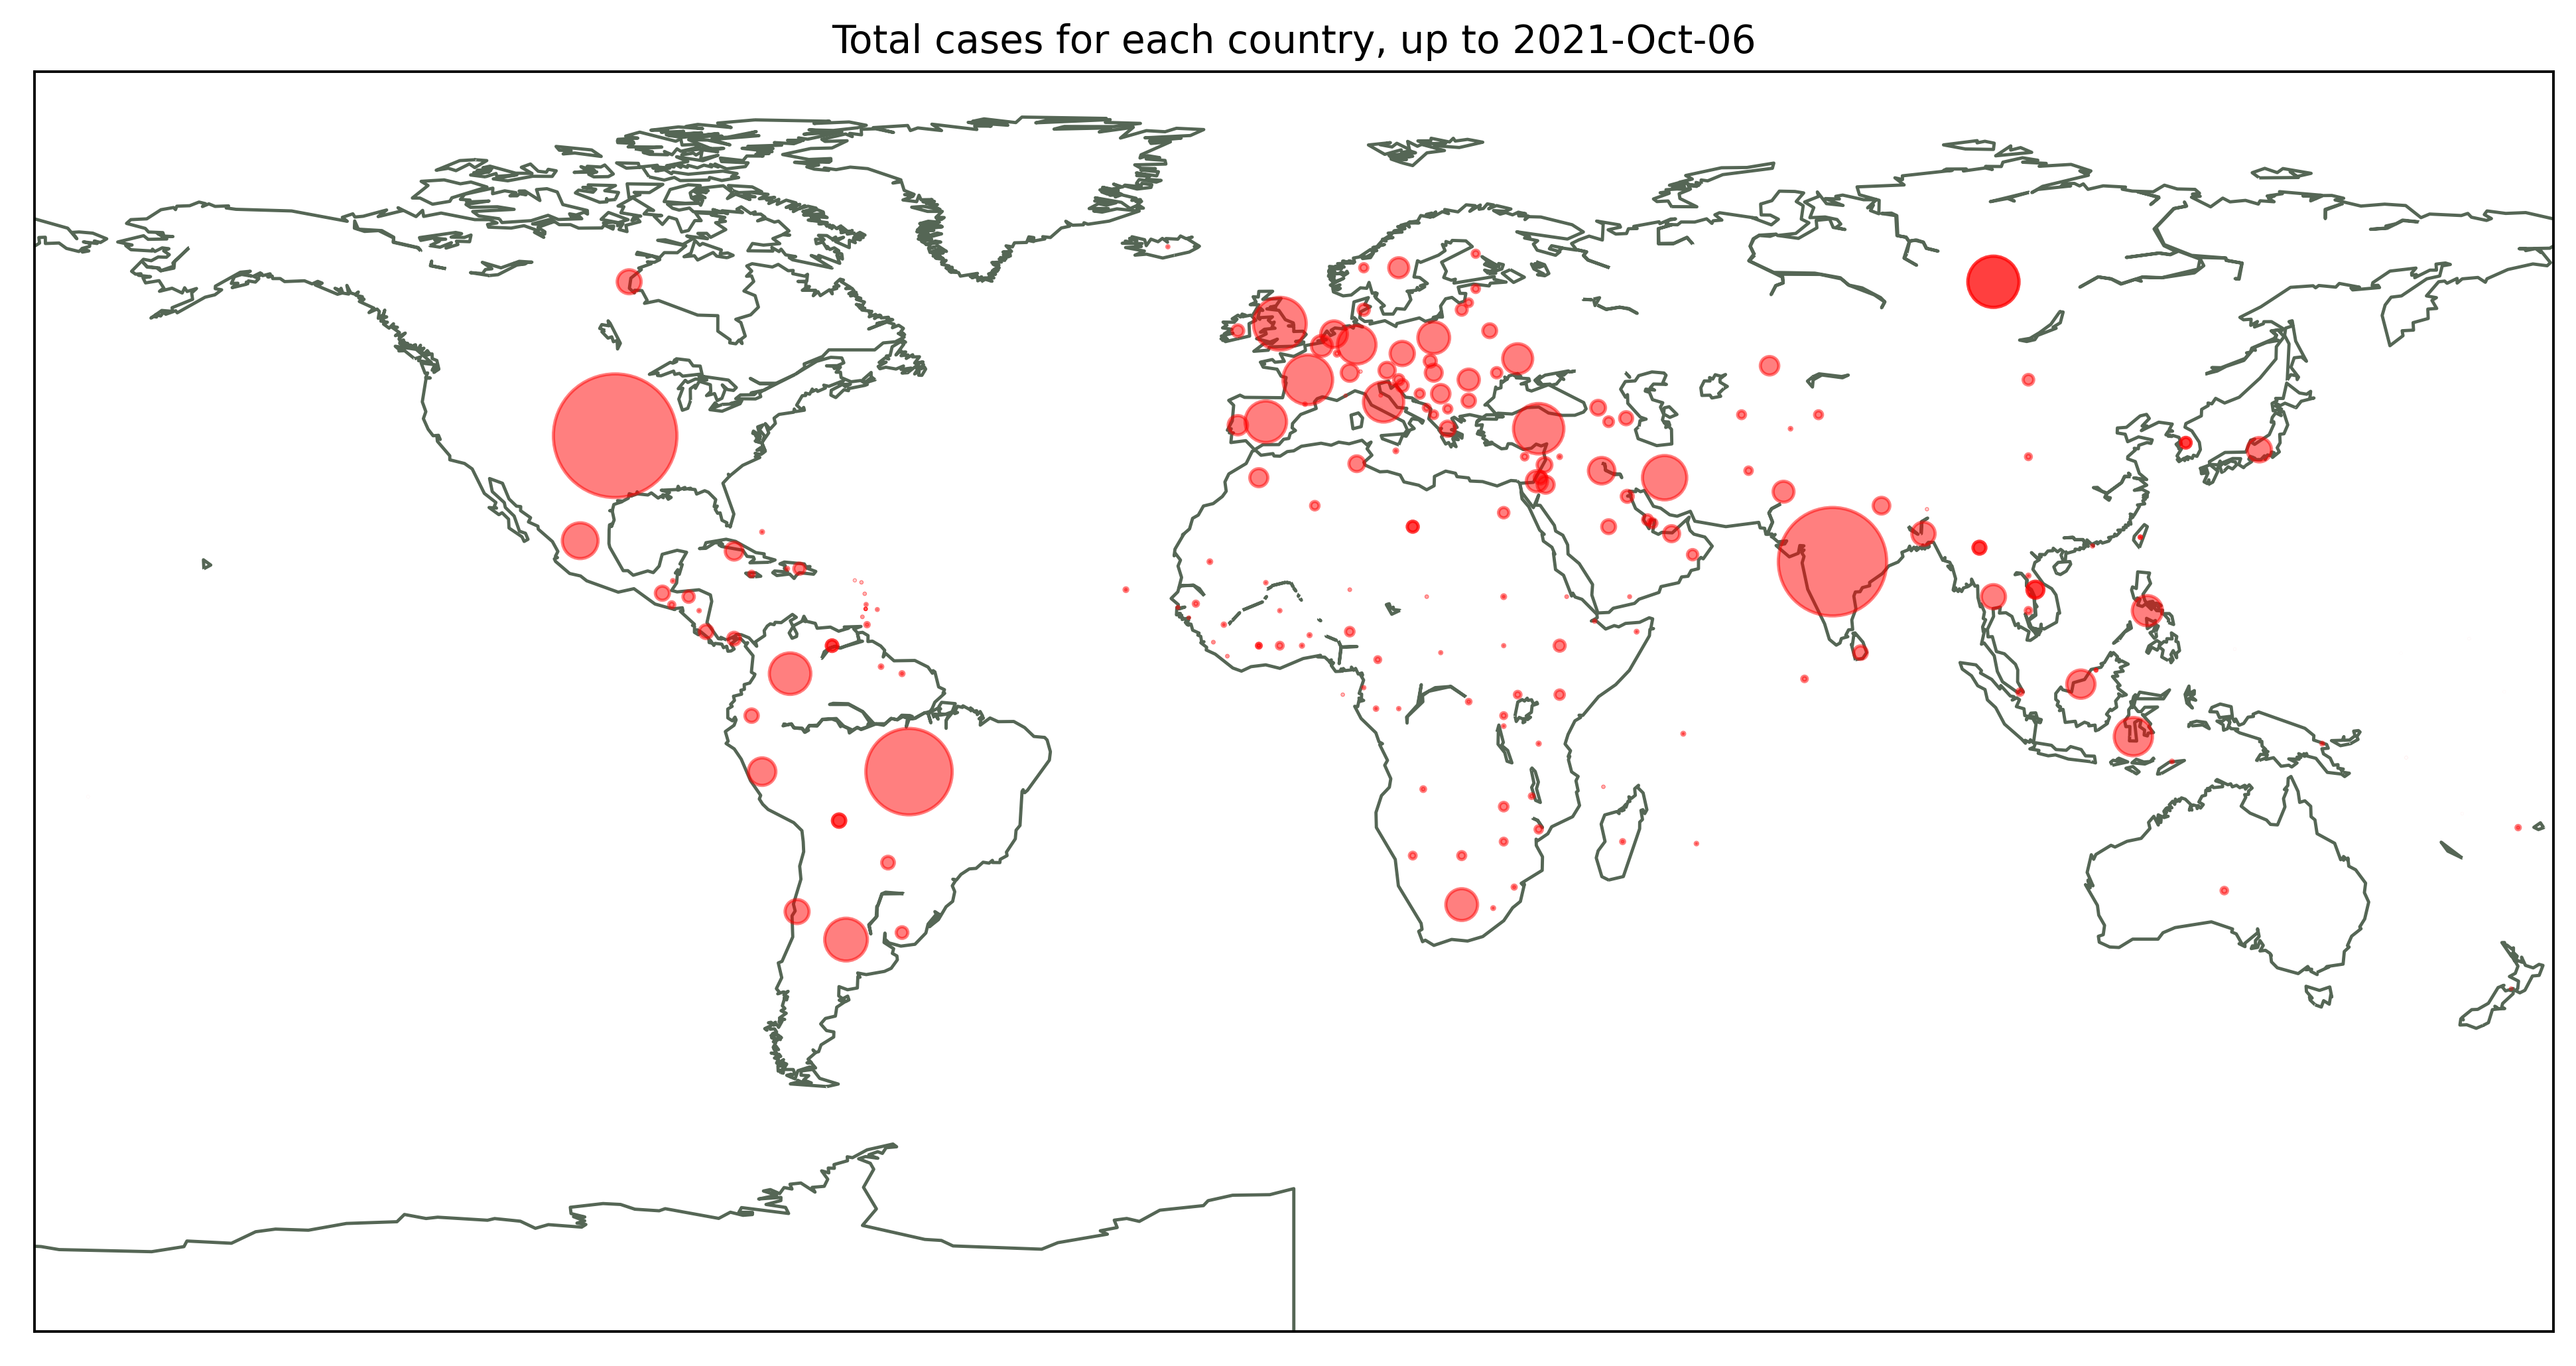

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# a figure for target on 2021-10-06
# different dot size represent the number of people got infected, scale = 30000
plt.figure(figsize=(14, 8), dpi=350)
earth = Basemap()
earth.drawcoastlines(color='#556655', linewidth=1)
df_newest[target].replace(np.nan, 0)
sz = [(df_newest.iloc[i][target]/30000) for i in range(df_newest.shape[0])]
plt.scatter(df_newest['longitude'],df_newest['latitude'],s=sz, c='red', alpha=0.5, zorder=10)
plt.title("Total cases for each country, up to 2021-Oct-06")
plt.savefig('../figures/total-cases-map.png')

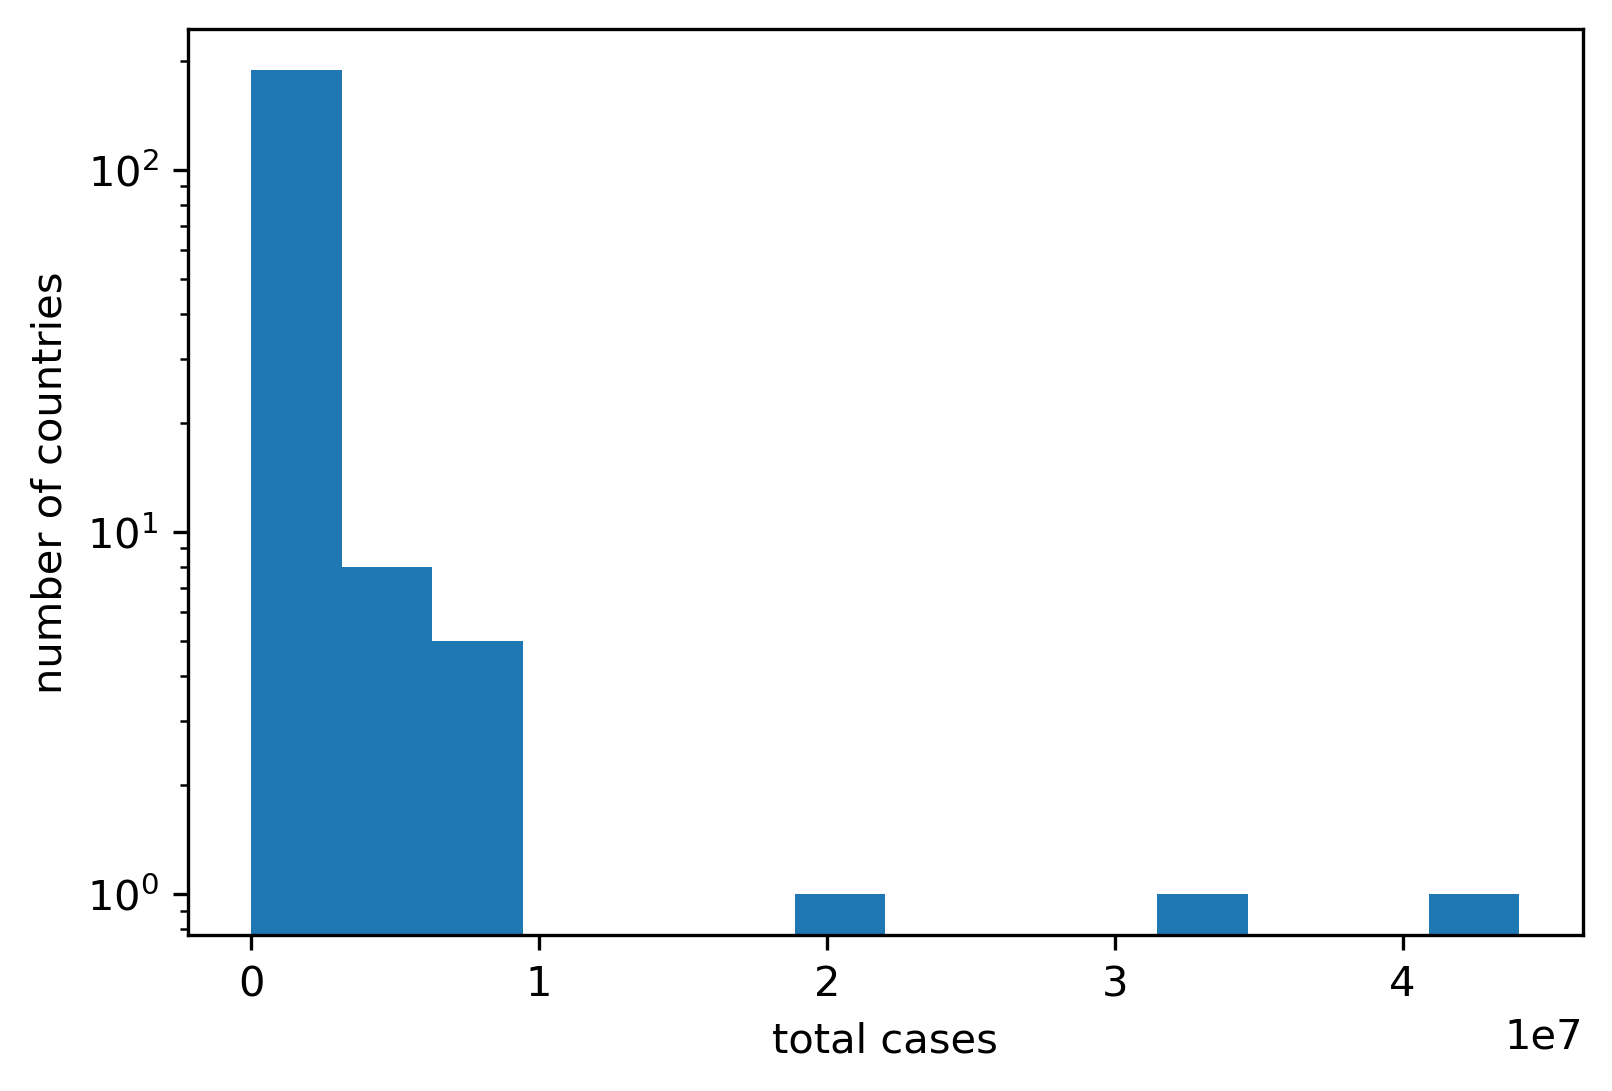

In [154]:
# histogram for number of total cases detected up to 2021-10-06
plt.figure(dpi=300)
df_newest[target].plot.hist(log=True, bins = int(np.sqrt(df_newest.shape[0])) ) # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
plt.xlabel('total cases')
plt.ylabel('number of countries')
plt.savefig('../figures/total-cases-hist.png')
plt.show()

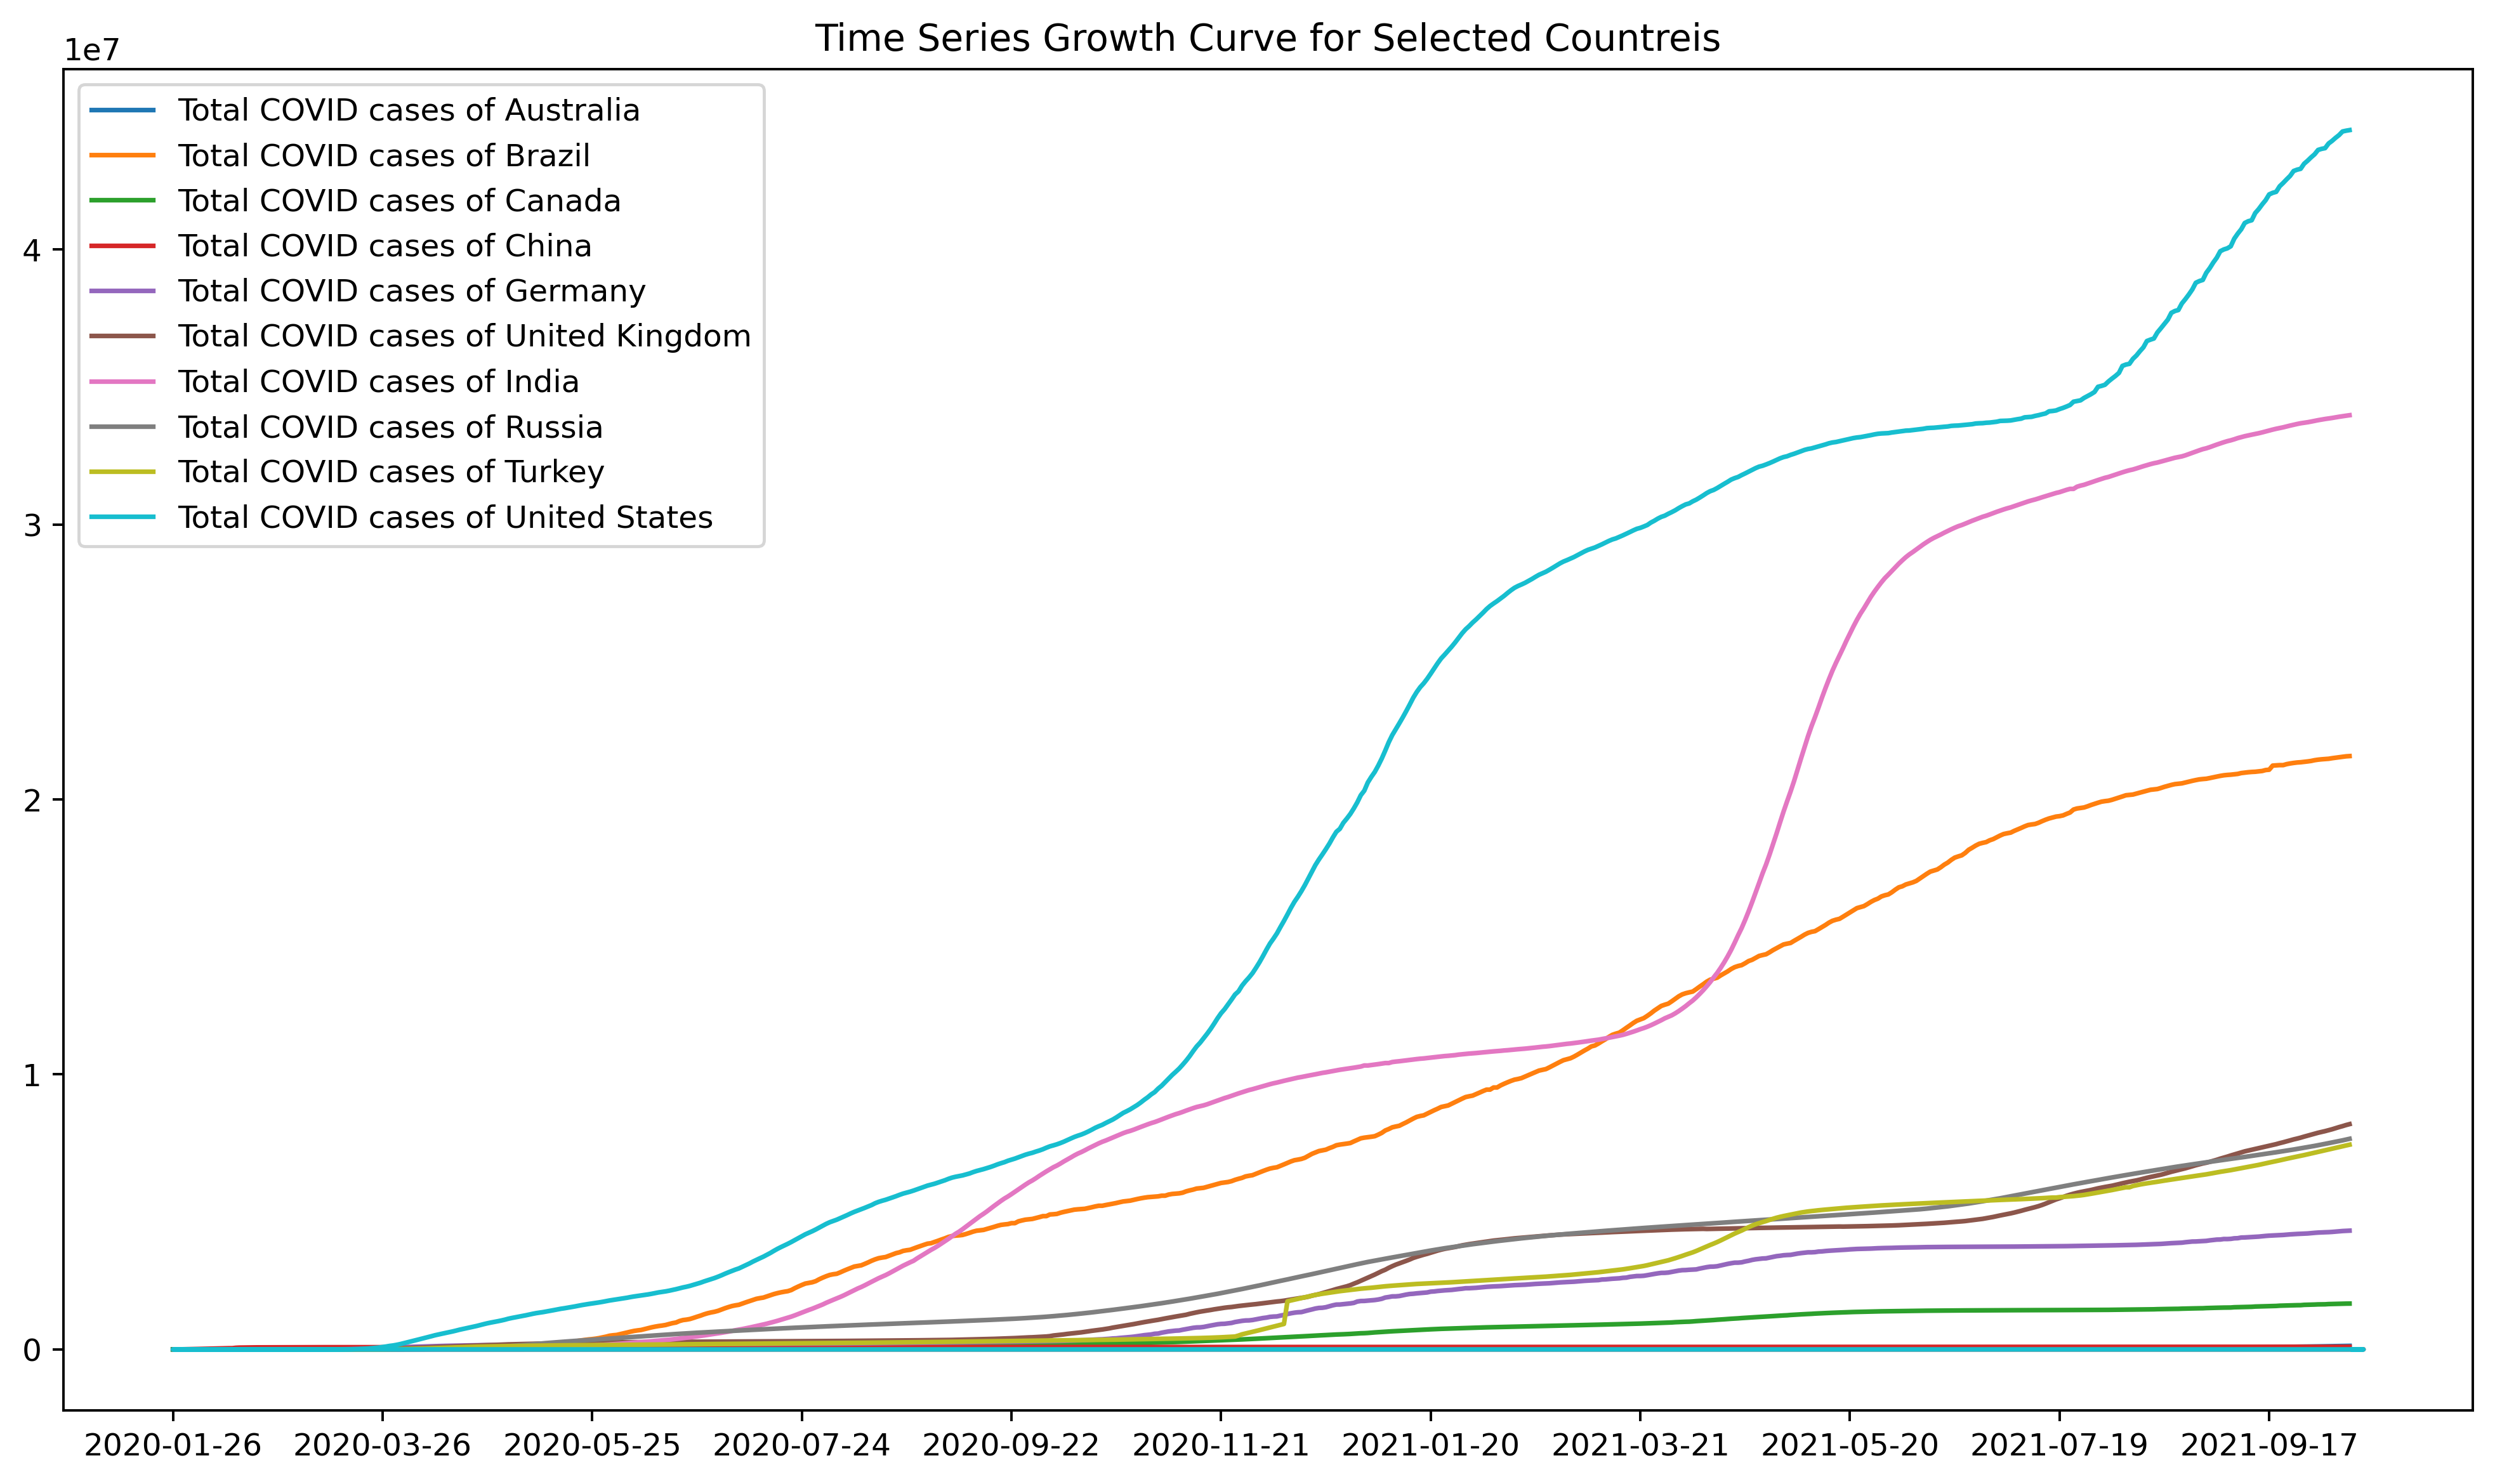

In [160]:
import matplotlib.ticker as ticker
# Some other figures using two columns

# total_cases are time series data
# df_USA = df_original[df_original['iso_code'] == 'USA']
# print(df_USA.shape)  #(628, 65)

df_by_state = df_original.groupby("iso_code")

regions = df_by_state['iso_code'].unique()
len(df_by_state) # 233 different regions
selected_countries = ['CHN', 'USA', 'CAN', 'GBR', 'IND', 'DEU', 'BRA', 'RUS', 'TUR', 'AUS']

#plt.figure(figsize=(14, 8), dpi=350)
fig, ax = plt.subplots(1,1,figsize=(14, 8), dpi=350)
for key, grp in df_by_state: 
    if key in selected_countries:
        plt.plot(grp['date'], grp[target], label="Total COVID cases of "+str(grp.iloc[0]['location']))
# loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
ax.set_xticks(ax.get_xticks()[::60])
plt.legend()    
plt.title("Time Series Growth Curve for Selected Countreis")
plt.savefig('../figures/total-cases-time-series.png')
plt.show()

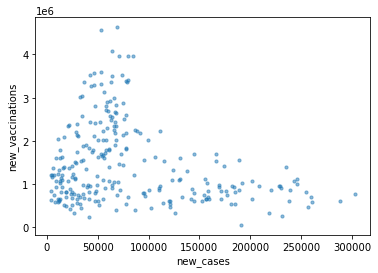

In [156]:
# scatter matrix for usa, vaccination and cases
df_USA = df_by_state.get_group('USA').set_index('date')
df_USA.plot.scatter('new_cases','new_vaccinations', alpha=0.5,s=10)
plt.savefig('../figures/new_vac-new_cases-scatter.png',dpi=300)
plt.show()

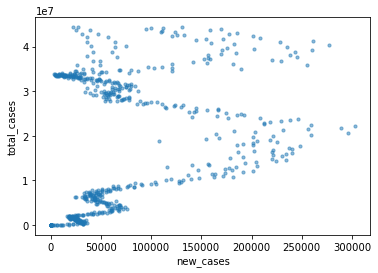

In [158]:
df_USA.plot.scatter('new_cases',target, alpha=0.5,s=10) 
plt.savefig('../figures/total_cases-new_cases-scatter.png',dpi=300)
plt.show()
# this figure shows strong relationship between the two variables

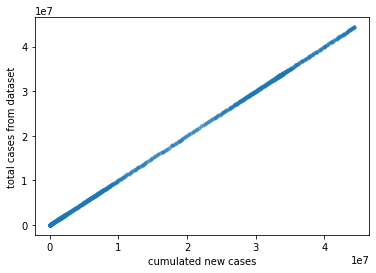

In [179]:
total_manual = []
cur = 0
for i in range(df_USA.shape[0]):
    new_case =  df_USA.iloc[i]['new_cases']
    if not np.isnan(new_case):
        cur += new_case
    total_manual.append(cur)
plt.scatter(total_manual, df_USA[target], alpha=0.5,s=10)
plt.xlabel('cumulated new cases')
plt.ylabel('total cases from dataset')
plt.savefig('../figures/total_cases-manual-scatter.png',dpi=300)
plt.show()

In [186]:
s1 = pd.Series(list(df_USA[target]))
s2 = pd.Series(total_manual)
print(s1.corr(s2))

1.0


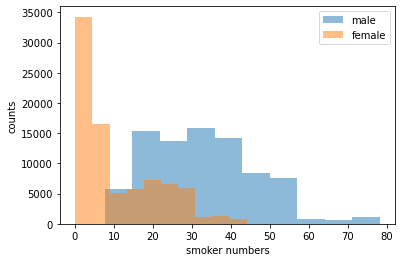

In [197]:
#df_original['female_smokers'].value_counts()
plt.hist(df_original['male_smokers'], alpha=0.5, label='male')
plt.hist(df_original['female_smokers'], alpha=0.5, label='female') # log=True, bins = np.logspace(np.log10(1),np.log10(np.max(df['capital-gain'])),50)
plt.xlabel('smoker numbers')
plt.ylabel('counts')
plt.legend(loc='upper right')
plt.savefig('../figures/gender_smokers.png', dpi=300)
plt.show()

# Preprocess data
The data is not iid, but have group structure as well as time series properties. So what I want to do is focus on only a few countries, and use times series modeling. At the same time, not all the columns are selected, as a lot are coorelated or can be inferred from each other, e.g. new_vaccinations is the first-order difference of total_vaccinations. Also, new_cases should not be included as a feature when preciting future total_cases.

However, auto-regression may be more important in this project. So in the following part, I will not only perform group splitting on the whole dataset, but also just focuse on independent specific countries, predicting their future trend using time series splitting. In the previous steps, I have already grouped the data by countries, and I'll select a few countries of interest.

In [52]:
# Coorelation/mutual-info test, feature selection
from sklearn.feature_selection import mutual_info_regression

ftr_original = list(data)
ftr_original.remove(target)
# Here I use zero-inpution, just a rough assessment for each feature
# This still makes sense because in this dataset missing data can be from non-increment of each day
# e.g. Some countries' deaths cases are nan because they have not reported any case
y = df_original[target].replace(np.nan, 0)
df_ftr_original = df_original[ftr_original].replace(np.nan, 0)
mutual_info = mutual_info_regression(df_ftr_original, y)

[0.90333145 1.56216942 2.81622013 0.59763274 1.04193798 2.26682037
 0.68870304 1.20315175 2.55295224 0.65821761 1.13536251 0.74240429
 0.19220784 0.19905149 0.198038   0.16189729 0.00484984 0.00349912
 0.01118241 0.00453802 0.43666146 0.74274939 0.43547287 0.26505271
 0.74662241 0.53799527 0.41770976 0.3589023  0.55480839 0.59662287
 0.49368082 0.07590351 0.29298331 0.83794457 0.23897917 0.25809438
 0.23231145 0.04693929 0.55677483 1.27969103 1.57786453 1.3800171
 1.23533203 1.40702339 1.40336498 1.46286948 0.72301556 1.43455943
 1.29317531 0.90536778 0.94913645 0.74434719 0.97469127 1.52392886
 1.33386534 0.03994207 0.02350604 0.0042492  0.02294499]


In [54]:
for i in range(len(ftr_original)):
    print(ftr_original[i], mutual_info[i])

new_cases 0.9033314532295265
new_cases_smoothed 1.5621694217801272
total_deaths 2.816220129832402
new_deaths 0.5976327371699082
new_deaths_smoothed 1.0419379762238377
total_cases_per_million 2.2668203727952028
new_cases_per_million 0.688703035580037
new_cases_smoothed_per_million 1.2031517518317543
total_deaths_per_million 2.5529522405579943
new_deaths_per_million 0.6582176102056589
new_deaths_smoothed_per_million 1.135362509834783
reproduction_rate 0.7424042879213673
icu_patients 0.19220784409267555
icu_patients_per_million 0.1990514938605359
hosp_patients 0.19803799998097205
hosp_patients_per_million 0.16189728827376326
weekly_icu_admissions 0.004849837463702933
weekly_icu_admissions_per_million 0.0034991190477904333
weekly_hosp_admissions 0.011182412142224818
weekly_hosp_admissions_per_million 0.004538024217483505
new_tests 0.4366614616387201
total_tests 0.7427493918041668
total_tests_per_thousand 0.4354728729085213
new_tests_per_thousand 0.26505270986214313
new_tests_smoothed 0.746

An insteresting phenonmenon here is that, though we already know that total_cases can just be calculated with new_cases, the mutual information for this index is not large enough. To predict total cases, we are actually predicting new_cases each day, and adding the data to the total_cases of one day before. So we cannot put it into our feature set. 

In [132]:
ftr_select = []
for ftr in ftr_original:
    if ftr.find('cases') == -1:
        ftr_select.append(ftr)
print(len(ftr_select)) 

54


In [168]:
import warnings
warnings.filterwarnings('ignore')

There are 54 features being selected:
    65 Columns at first, with 4 columns regarding indexing are not included in ftr_original, test places and target removed and 5 regarding new cases deleted from ftr_original.

In [187]:
from sklearn.preprocessing import StandardScaler
# splitting
# account for group structure, choose one country each time
# 5 times cross validation
def getSplitted_KFold(df_by_state, state_name, test_size, n_splits=5):
    tolerance = 1e-15

    X = np.array(df_by_state.get_group(state_name).set_index('date')[ftr_select])
    y = np.array(df_by_state.get_group(state_name)[target])
    if len(X) != len(y):
        raise AttributeError("number of rows in X is not same as the length of y")
    training_total = (int)((1 - test_size) * len(y))
    each_cv = (int)(training_total / (n_splits+1))
    train_X, train_y, val_X, val_y, test_X, test_y = [], [], [], [], [], y[training_total:]
    
    for i in range(n_splits):
        train_index = (i+1) * each_cv
        val_index = (i+2) * each_cv
        train_X_tmp, val_X_tmp = X[: train_index], X[train_index:val_index]
        train_y_tmp, val_y_tmp = y[: train_index], y[train_index:val_index]
        test_X_tmp = X[training_total:]
        print(len(train_X_tmp),len(val_X_tmp),len(test_X_tmp))
        
        # Auto Encoder
        # On getSplitting_Once data, using standard encoder
        # As explained before, all the 54 features here considered continuous
        scaler = StandardScaler()
        scaler.fit_transform(train_X_tmp)
        scaler.transform(val_X_tmp)
        scaler.transform(test_X_tmp)
        
        train_X.append(train_X_tmp)
        val_X.append(val_X_tmp)
        test_X = test_X_tmp # only the last transform counts
        train_y.append(train_y_tmp)
        val_y.append(val_y_tmp)
        
    return train_X, train_y, val_X, val_y, test_X, test_Y

train_X, train_y, val_X, val_y, test_X, test_Y = getSplitted_KFold(df_by_state, 'USA', 0.1, 5)
for i in range(5):
    print(train_X[i], val_X[i], test_X[i])

94 94 63
188 94 63
282 94 63
376 94 63
470 94 63
[[      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 [      nan       nan       nan ...       nan       nan       nan]
 ...
 [50135.     2473.     2202.286 ...       nan       nan       nan]
 [52570.     2435.     2236.143 ...       nan       nan       nan]
 [54748.     2178.     2245.429 ...       nan       nan       nan]] [[5.64720000e+04 1.72400000e+03 2.21457100e+03 ...            nan
             nan            nan]
 [5.78850000e+04 1.41300000e+03 2.13228600e+03 ... 6.98000000e+00
  3.41500000e+01 2.11222938e+02]
 [5.93800000e+04 1.49500000e+03 2.02528600e+03 ...            nan
             nan            nan]
 ...
 [1.47119000e+05 9.32000000e+02 9.22714000e+02 ...            nan
             nan            nan]
 [1.47650000e+05 5.31000000e+02 9.29286000e+02 ... 1.06100000e+01
  2.27000000e+01 5.42300467e+02]
 [1.48777000e+05 1.12700000e+03 1.01000000e